## Atividade - Segurança do Paciente

Lucas Rodrigues Lopes

In [110]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [119]:
# 1. Baixando planilha para o código
pediatria = pd.read_excel("pediatria.xlsx")
#display(pediatria)

In [120]:
# a)

pediatria['RX_Tórax'] = pediatria.loc[pediatria['Evento'] == 'RX_TX', 'Qtde']
pediatria['RX_Seios_da_Face'] = pediatria.loc[pediatria['Evento'] == 'RX_SF', 'Qtde']
pediatria['TC'] = pediatria.loc[pediatria['Evento'] == 'TC', 'Qtde']
pediatria['Atendimentos'] = pediatria.loc[pediatria['Evento'] == 'Atend', 'Qtde']

pediatria['Data'] = pd.to_datetime(pediatria['Ano'].astype(str) + '-' + pediatria['Mês'].astype(str))

# Separando bases de dados
zero_quatro = pediatria.loc[pediatria['Faixa_etária'] == "0-4 anos"]
cinco_oito = pediatria.loc[pediatria['Faixa_etária'] == "5-8 anos"]
nove_doze = pediatria.loc[pediatria['Faixa_etária'] == "9-12 anos"]

#=====================================================================================================================

zero_quatro = zero_quatro.groupby(['Ano'])[['RX_Tórax', 'RX_Seios_da_Face', 'TC', 'Atendimentos']].sum().reset_index()
zero_quatro['% RX_T'] = round((zero_quatro['RX_Tórax'] / zero_quatro['Atendimentos']) * 100,1)
zero_quatro['% RX_SF'] = round((zero_quatro['RX_Seios_da_Face'] / zero_quatro['Atendimentos']) * 100,1)
zero_quatro['% TC'] = round((zero_quatro['TC'] / zero_quatro['Atendimentos']) * 100,1)

nova_ordem_colunas = ['Ano','RX_Tórax','% RX_T', 'RX_Seios_da_Face', '% RX_SF', 'TC','% TC', 'Atendimentos']
zero_quatro = zero_quatro[nova_ordem_colunas]

#=====================================================================================================================

cinco_oito = cinco_oito.groupby(['Ano'])[['RX_Tórax', 'RX_Seios_da_Face', 'TC', 'Atendimentos']].sum().reset_index()
cinco_oito['% RX_T'] = round((cinco_oito['RX_Tórax'] / cinco_oito['Atendimentos']) * 100,1)
cinco_oito['% RX_SF'] = round((cinco_oito['RX_Seios_da_Face'] / cinco_oito['Atendimentos']) * 100,1)
cinco_oito['% TC'] = round((cinco_oito['TC'] / cinco_oito['Atendimentos']) * 100,1)

nova_ordem_colunas = ['Ano','RX_Tórax','% RX_T', 'RX_Seios_da_Face', '% RX_SF', 'TC','% TC', 'Atendimentos']
cinco_oito = cinco_oito[nova_ordem_colunas]

#=====================================================================================================================

nove_doze = nove_doze.groupby(['Ano'])[['RX_Tórax', 'RX_Seios_da_Face', 'TC', 'Atendimentos']].sum().reset_index()
nove_doze['% RX_T'] = round((nove_doze['RX_Tórax'] / nove_doze['Atendimentos']) * 100,1)
nove_doze['% RX_SF'] = round((nove_doze['RX_Seios_da_Face'] / nove_doze['Atendimentos']) * 100,1)
nove_doze['% TC'] = round((nove_doze['TC'] / nove_doze['Atendimentos']) * 100,1)

nova_ordem_colunas = ['Ano','RX_Tórax','% RX_T', 'RX_Seios_da_Face', '% RX_SF', 'TC','% TC', 'Atendimentos']
nove_doze = nove_doze[nova_ordem_colunas]

# display(pediatria)
print('Tabela Faixa Etária 0-4 anos')
display(zero_quatro)
print('Tabela Faixa Etária 5-8 anos')
display(cinco_oito)
print('Tabela Faixa Etária 9-12 anos')
display(nove_doze)

Tabela Faixa Etária 0-4 anos


,Ano,RX_Tórax,% RX_T,RX_Seios_da_Face,% RX_SF,TC,% TC,Atendimentos
0,2018,1381.0,10.5,208.0,1.6,21.0,0.2,13208.0
1,2019,1150.0,8.4,152.0,1.1,30.0,0.2,13704.0


Tabela Faixa Etária 5-8 anos


,Ano,RX_Tórax,% RX_T,RX_Seios_da_Face,% RX_SF,TC,% TC,Atendimentos
0,2018,246.0,5.2,114.0,2.4,11.0,0.2,4699.0
1,2019,252.0,4.6,90.0,1.6,7.0,0.1,5470.0


Tabela Faixa Etária 9-12 anos


,Ano,RX_Tórax,% RX_T,RX_Seios_da_Face,% RX_SF,TC,% TC,Atendimentos
0,2018,103.0,3.5,58.0,2.0,16.0,0.5,2957.0
1,2019,153.0,4.4,71.0,2.0,8.0,0.2,3471.0


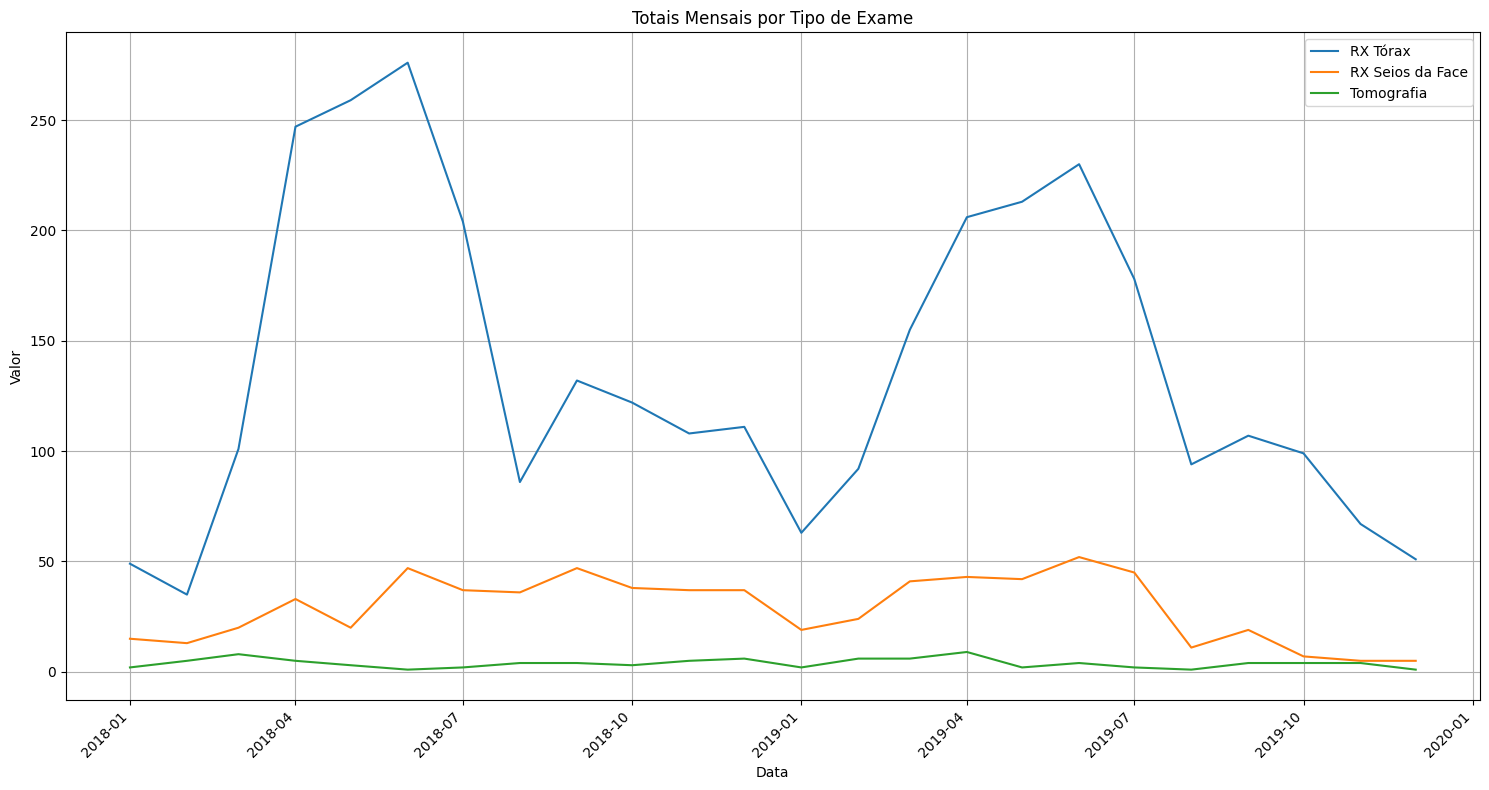

In [121]:
# b)

# pediatria['Data'] = pd.to_datetime(pediatria['Ano'].astype(str) + '-' + pediatria['Mês'].astype(str))
# display(pediatria)
df_torax = pediatria[pediatria.Evento == 'RX_TX'].groupby(['Data'])['Qtde'].sum().reset_index()
df_sface = pediatria[pediatria.Evento == 'RX_SF'].groupby(['Data'])['Qtde'].sum().reset_index()
df_tomografia = pediatria[pediatria.Evento == 'TC'].groupby(['Data'])['Qtde'].sum().reset_index()
df_torax

x = df_torax.loc[:,'Data']
y1 = df_torax.loc[:,'Qtde']
y2 = df_sface.loc[:,'Qtde']
y3 = df_tomografia.loc[:,'Qtde']

# Criar o gráfico de linha
plt.figure(figsize=(15, 8))
plt.plot(x, y1, label='RX Tórax')
plt.plot(x, y2, label='RX Seios da Face')
plt.plot(x, y3, label='Tomografia')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos aos eixos e título
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Totais Mensais por Tipo de Exame')

# Adicionar legenda
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

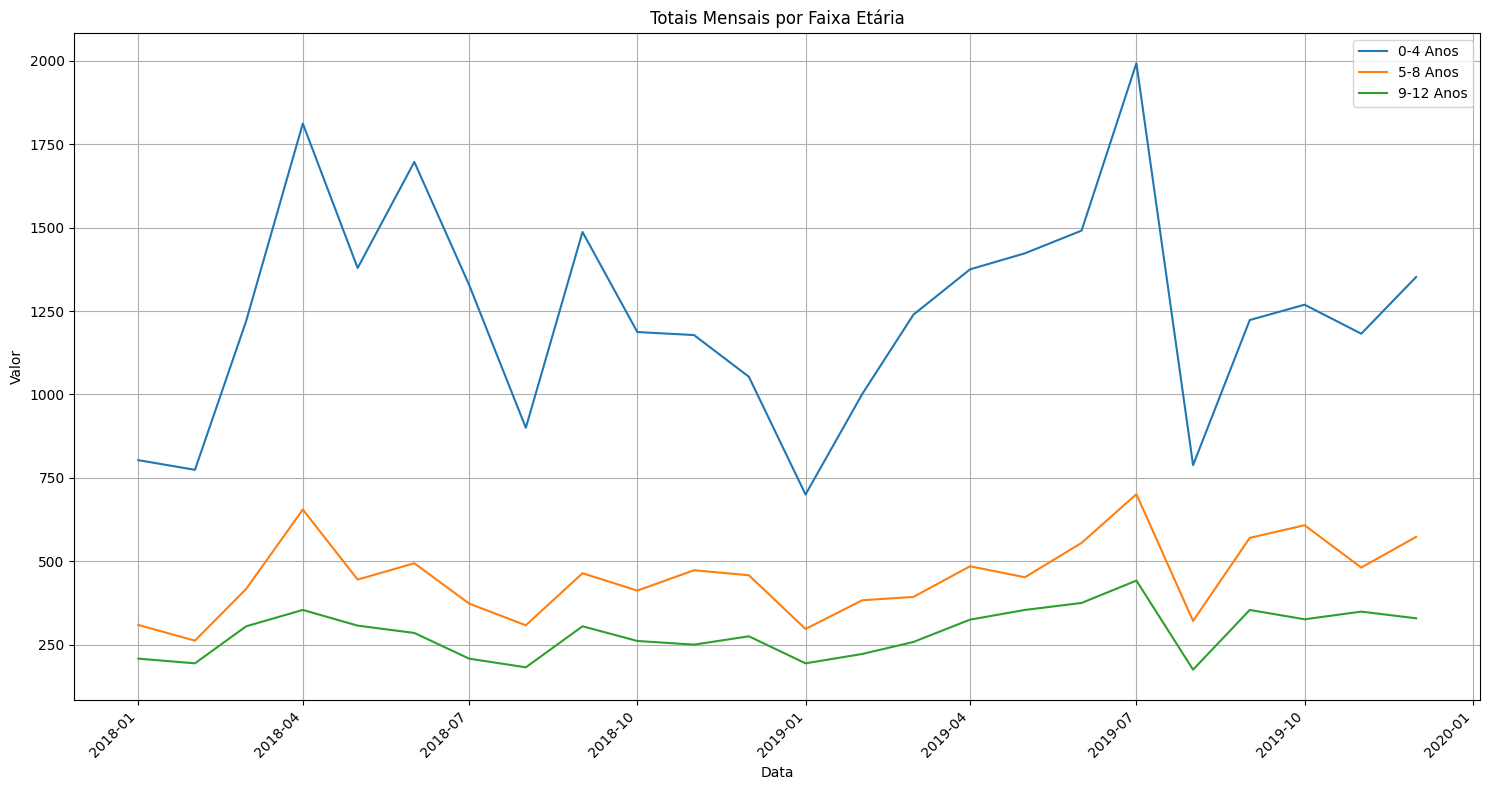

In [122]:
# c)

# pediatria['Data'] = pd.to_datetime(pediatria['Ano'].astype(str) + '-' + pediatria['Mês'].astype(str))
# display(pediatria)
df_0_4 = pediatria[pediatria.Faixa_etária == '0-4 anos'].groupby(['Data'])['Qtde'].sum().reset_index()
df_5_8 = pediatria[pediatria.Faixa_etária == '5-8 anos'].groupby(['Data'])['Qtde'].sum().reset_index()
df_9_12 = pediatria[pediatria.Faixa_etária == '9-12 anos'].groupby(['Data'])['Qtde'].sum().reset_index()
df_0_4

x = df_0_4.loc[:,'Data']
y1 = df_0_4.loc[:,'Qtde']
y2 = df_5_8.loc[:,'Qtde']
y3 = df_9_12.loc[:,'Qtde']

# Criar o gráfico de linha
plt.figure(figsize=(15, 8))
plt.plot(x, y1, label='0-4 Anos')
plt.plot(x, y2, label='5-8 Anos')
plt.plot(x, y3, label='9-12 Anos')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos aos eixos e título
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Totais Mensais por Faixa Etária')

# Adicionar legenda
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.tight_layout()
plt.show()

4071


,Ano,Evento,Qtde
0,2018,RX_SF,380
1,2018,RX_TX,1730
2,2018,TC,48
3,2019,RX_SF,313
4,2019,RX_TX,1555
5,2019,TC,45


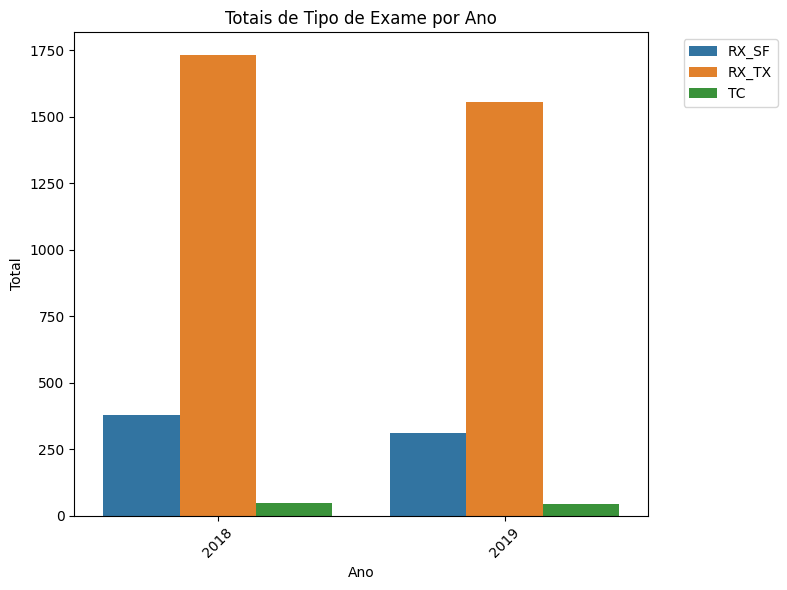

In [123]:
# d)

sem_atendimento = pediatria[pediatria['Evento'] != 'Atend']
df_total = sem_atendimento.groupby(['Ano','Evento'])['Qtde'].sum().reset_index()
print(df_total['Qtde'].sum())
display(df_total)

df_total['Ano'] = df_total['Ano']
plt.figure(figsize=(8, 6))
sns.barplot(data=df_total, x="Ano", y=("Qtde"), hue="Evento")
plt.xticks(rotation=45)

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Totais de Tipo de Exame por Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()

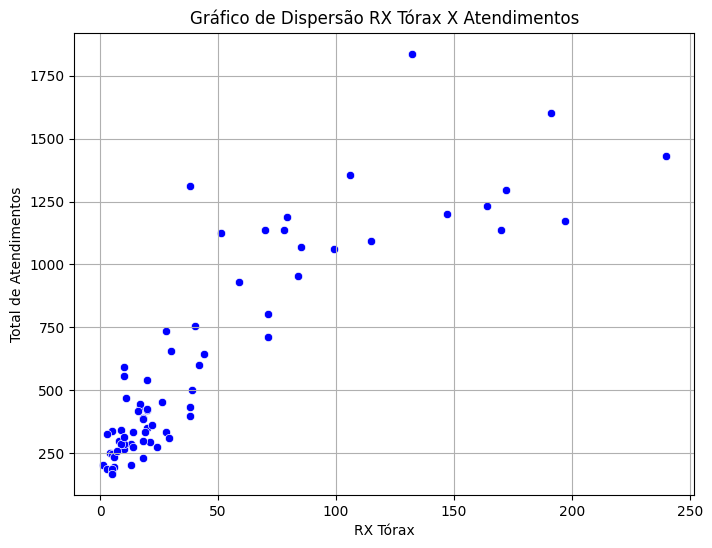

In [128]:
# e)

# display(pediatria)

torax = pediatria[pediatria['Evento'] == "RX_TX"]
# display(torax.head())
atend = pediatria[pediatria['Evento'] == "Atend"]
# display(atend.head())

data_frame_dispersao = pd.DataFrame({'X': torax['Qtde'].to_list(),'Y': atend.Qtde.to_list()})

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', data=data_frame_dispersao, color='blue', marker='o')
plt.title(f'Gráfico de Dispersão RX Tórax X Atendimentos')
plt.xlabel('RX Tórax')
plt.ylabel('Total de Atendimentos')
plt.grid(True)
plt.show()


In [125]:
# f)

## Correlação das variáveis
correlacao = data_frame_dispersao['X'].corr(data_frame_dispersao['Y'])
print(f"Correlação: {correlacao:.2%}")

Correlação: 86.23%


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.26e-22
Time:                        01:46:42   Log-Likelihood:                -486.41
No. Observations:                  72   AIC:                             976.8
Df Residuals:                      70   BIC:                             981.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    306.6700     32.458      9.448      0.0

C:\Users\lucas\AppData\Local\Temp\ipykernel_10560\3474022353.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='red')


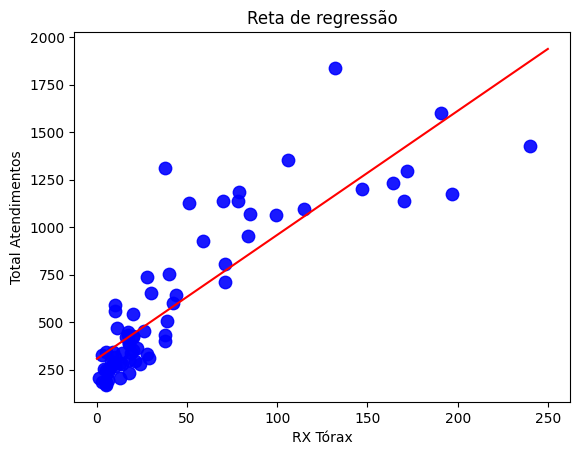

In [126]:
# g)

# Criação do modelo OLS - Ordinary Least Squares
regressao = smf.ols('Y ~ X', data = data_frame_dispersao).fit()
print(regressao.summary())

#================================================================================

plt.scatter(y=data_frame_dispersao.Y, x=data_frame_dispersao.X, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 250)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='red')
plt.title('Reta de regressão')
plt.ylabel('Total Atendimentos')
plt.xlabel('RX Tórax')
plt.show()